In [7]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [10]:
df = pd.read_csv('./data/user_data.csv')
df.head()

,cid,status,age,dob_cnt_same_cnt_res,nationality_same_cnt_res,dob_cnt_same_nationality,phn_cnt_same_res,cnt_res_same_last_ip,cpi,ip_diversity,ua_diversity,loc_diversity,unk_trx_rate,low_trx_rate,high_trx_rate,fail_trx_rate
0,2,accepted,37,0,0,1,0,0,62,1,1,1,0.13,0.72,0.16,0.00
1,4,accepted,44,1,1,1,1,1,74,1,1,1,0.27,0.86,0.44,0.05
2,5,accepted,35,0,0,1,0,0,60,0,0,0,0.00,0.87,0.16,0.00
3,8,banned,36,0,0,1,1,0,73,0,0,0,0.00,0.03,0.58,0.00
4,10,banned,36,1,1,1,1,0,28,0,0,0,0.00,0.08,0.89,0.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cid                       294 non-null    int64  
 1   status                    294 non-null    object 
 2   age                       294 non-null    int64  
 3   dob_cnt_same_cnt_res      294 non-null    int64  
 4   nationality_same_cnt_res  294 non-null    int64  
 5   dob_cnt_same_nationality  294 non-null    int64  
 6   phn_cnt_same_res          294 non-null    int64  
 7   cnt_res_same_last_ip      294 non-null    int64  
 8   cpi                       294 non-null    int64  
 9   ip_diversity              294 non-null    int64  
 10  ua_diversity              294 non-null    int64  
 11  loc_diversity             294 non-null    int64  
 12  unk_trx_rate              294 non-null    float64
 13  low_trx_rate              294 non-null    float64
 14  high_trx_r

In [12]:
df[df.duplicated()]

,cid,status,age,dob_cnt_same_cnt_res,nationality_same_cnt_res,dob_cnt_same_nationality,phn_cnt_same_res,cnt_res_same_last_ip,cpi,ip_diversity,ua_diversity,loc_diversity,unk_trx_rate,low_trx_rate,high_trx_rate,fail_trx_rate


In [14]:
df.describe()

,cid,age,dob_cnt_same_cnt_res,nationality_same_cnt_res,dob_cnt_same_nationality,phn_cnt_same_res,cnt_res_same_last_ip,cpi,ip_diversity,ua_diversity,loc_diversity,unk_trx_rate,low_trx_rate,high_trx_rate,fail_trx_rate
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,1080.122449,36.979592,0.591837,0.714286,0.819728,0.707483,0.044218,53.108844,0.316327,0.316327,0.316327,0.027109,0.338231,0.427177,0.004898
std,662.115999,14.172978,0.492332,0.452524,0.385069,0.455694,0.205929,21.198599,0.465835,0.465835,0.465835,0.108443,0.334592,0.326736,0.028961
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.500000,29.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.092500,0.000000
50%,1103.500000,37.000000,1.000000,1.000000,1.000000,1.000000,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.425000,0.000000
75%,1515.750000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,73.000000,1.000000,1.000000,1.000000,0.000000,0.690000,0.710000,0.000000
max,2504.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.990000,0.330000


In [15]:
count_zero_cpi = len(df.loc[df['cpi'] == 0])
print(count_zero_cpi)

11


In [16]:
df['age'] = df['age'].replace(0, 99)

In [17]:
count_replace_age = len(df.loc[df['age'] == 99])
print(count_replace_age)

14


In [18]:
df.corr(numeric_only=True)

,cid,age,dob_cnt_same_cnt_res,nationality_same_cnt_res,dob_cnt_same_nationality,phn_cnt_same_res,cnt_res_same_last_ip,cpi,ip_diversity,ua_diversity,loc_diversity,unk_trx_rate,low_trx_rate,high_trx_rate,fail_trx_rate
cid,1.000000,0.116352,-0.151177,-0.097286,-0.146680,-0.060613,0.006969,0.086636,0.459054,0.459054,0.459054,0.124285,0.396422,-0.028693,0.047730
age,0.116352,1.000000,-0.282261,-0.278199,-0.075200,-0.435149,0.008635,-0.065488,-0.062292,-0.062292,-0.062292,-0.044211,0.294540,-0.059890,-0.044099
dob_cnt_same_cnt_res,-0.151177,-0.282261,1.000000,0.715620,0.510686,0.226636,0.144958,-0.032354,-0.194065,-0.194065,-0.194065,-0.226100,-0.364693,0.236168,-0.081922
nationality_same_cnt_res,-0.097286,-0.278199,0.715620,1.000000,-0.022384,0.255354,0.099410,-0.010623,-0.217414,-0.217414,-0.217414,-0.295085,-0.307654,0.237591,-0.101193
dob_cnt_same_nationality,-0.146680,-0.075200,0.510686,-0.022384,1.000000,-0.009791,0.014786,-0.041907,-0.118625,-0.118625,-0.118625,-0.093439,-0.221289,0.101464,-0.042971
phn_cnt_same_res,-0.060613,-0.435149,0.226636,0.255354,-0.009791,1.000000,0.065565,0.170068,0.115826,0.115826,0.115826,0.087806,-0.189194,-0.008316,-0.038475
cnt_res_same_last_ip,0.006969,0.008635,0.144958,0.099410,0.014786,0.065565,1.000000,0.212331,0.316210,0.316210,0.316210,0.062292,0.098720,-0.051399,0.066571
cpi,0.086636,-0.065488,-0.032354,-0.010623,-0.041907,0.170068,0.212331,1.000000,0.125070,0.125070,0.125070,0.058380,0.067893,-0.292365,-0.026611
ip_diversity,0.459054,-0.062292,-0.194065,-0.217414,-0.118625,0.115826,0.316210,0.125070,1.000000,1.000000,1.000000,0.368134,0.405412,-0.126860,0.249058
ua_diversity,0.459054,-0.062292,-0.194065,-0.217414,-0.118625,0.115826,0.316210,0.125070,1.000000,1.000000,1.000000,0.368134,0.405412,-0.126860,0.249058


In [59]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix.values[
    [i for i in range(correlation_matrix.shape[0])],
    [i for i in range(correlation_matrix.shape[1])],
] = None
abs_correlation = correlation_matrix.abs().unstack()
sorted_correlation = abs_correlation.sort_values(ascending=False)
top = sorted_correlation.drop_duplicates()[:5]
for (var1, var2), corr in top.items():
    print(f"Variables: {var1} and {var2}")
    print(f"Correlation: {corr}")
    print()

Variables: ua_diversity and ip_diversity
Correlation: 1.0

Variables: status_accepted and low_trx_rate
Correlation: 0.9743261776121088

Variables: high_trx_rate and status_banned
Correlation: 0.8725848047002056

Variables: nationality_same_cnt_res and dob_cnt_same_cnt_res
Correlation: 0.7156200590854879

Variables: status_banned and status_accepted
Correlation: 0.7087209775878893



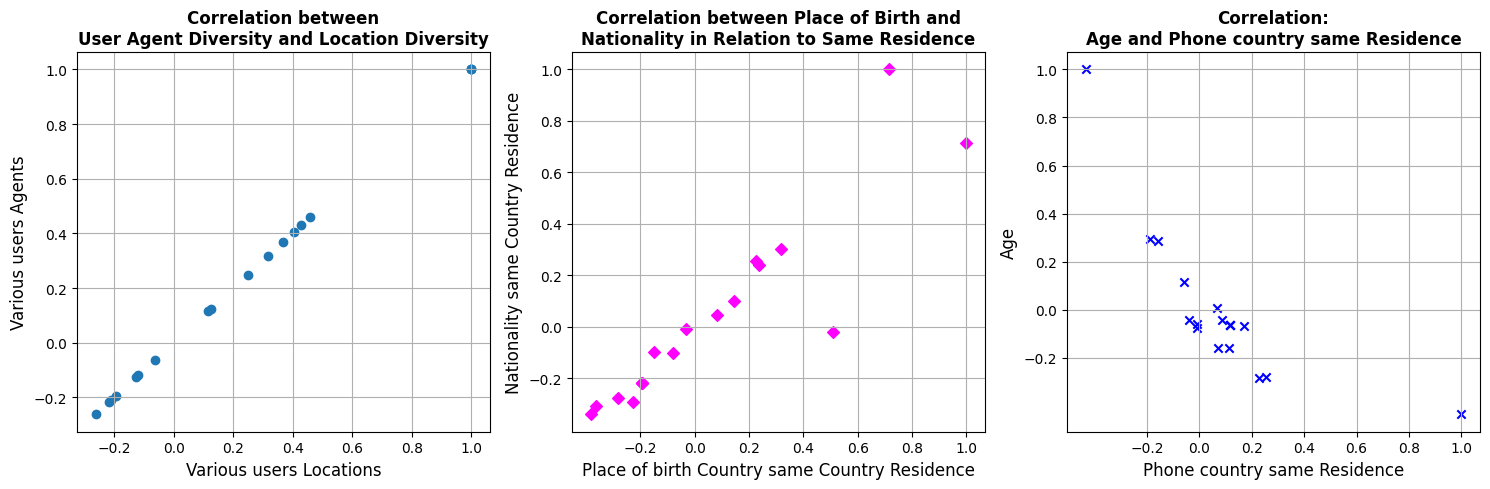

In [52]:
correlation_matrix = df.corr(numeric_only=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(correlation_matrix['loc_diversity'], correlation_matrix['ua_diversity'])
axes[0].set_xlabel('Various users Locations', fontsize = 12 )
axes[0].set_ylabel('Various users Agents', fontsize = 12)
axes[0].set_xticks(np.arange(-0.2,1.2,0.2))
axes[0].set_yticks(np.arange(-0.2,1.2, 0.2))
axes[0].set_title('Correlation between\nUser Agent Diversity and Location Diversity',fontsize = 12, fontweight='bold')
axes[0].grid(True)

axes[1].scatter(correlation_matrix['dob_cnt_same_cnt_res'], correlation_matrix['nationality_same_cnt_res'], marker='D', c='magenta')
axes[1].set_xlabel('Place of birth Country same Country Residence', fontsize = 12 )
axes[1].set_ylabel('Nationality same Country Residence', fontsize = 12)
axes[1].set_xticks(np.arange(-0.2,1.2,0.2))
axes[1].set_yticks(np.arange(-0.2,1.2, 0.2))
axes[1].set_title('Correlation between Place of Birth and\nNationality in Relation to Same Residence',fontsize = 12, fontweight='bold')
axes[1].grid(True)

axes[2].scatter(correlation_matrix['phn_cnt_same_res'], correlation_matrix['age'], marker='x', c='blue')
axes[2].set_xlabel('Phone country same Residence', fontsize = 12 )
axes[2].set_ylabel('Age', fontsize = 12)
axes[2].set_xticks(np.arange(-0.2,1.2,0.2))
axes[2].set_yticks(np.arange(-0.2,1.2, 0.2))
axes[2].set_title('Correlation:\nAge and Phone country same Residence',fontsize = 12, fontweight='bold')
axes[2].grid(True)


plt.tight_layout()


In [21]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['status']
['cid', 'age', 'dob_cnt_same_cnt_res', 'nationality_same_cnt_res', 'dob_cnt_same_nationality', 'phn_cnt_same_res', 'cnt_res_same_last_ip', 'cpi', 'ip_diversity', 'ua_diversity', 'loc_diversity', 'unk_trx_rate', 'low_trx_rate', 'high_trx_rate', 'fail_trx_rate']


In [22]:
data_numerical = df[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,cid,age,dob_cnt_same_cnt_res,nationality_same_cnt_res,dob_cnt_same_nationality,phn_cnt_same_res,cnt_res_same_last_ip,cpi,ip_diversity,ua_diversity,loc_diversity,unk_trx_rate,low_trx_rate,high_trx_rate,fail_trx_rate
count,2.940000e+02,2.940000e+02,294.000000,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,294.000000,2.940000e+02,2.940000e+02
mean,9.667248e-17,9.667248e-17,0.000000,-4.229421e-17,-2.416812e-17,-6.042030e-18,-3.625218e-17,1.691768e-16,-9.667248e-17,-9.667248e-17,-9.667248e-17,-5.437827e-17,0.000000,-1.087565e-16,5.437827e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.628298e+00,-1.316776e+00,-1.202110,-1.578448e+00,-2.128780e+00,-1.552539e+00,-2.147230e-01,-2.505300e+00,-6.790529e-01,-6.790529e-01,-6.790529e-01,-2.499825e-01,-1.010877,-1.307408e+00,-1.691239e-01
25%,-9.947237e-01,-5.624718e-01,-1.202110,-1.578448e+00,4.681549e-01,-1.552539e+00,-2.147230e-01,-9.485930e-01,-6.790529e-01,-6.790529e-01,-6.790529e-01,-2.499825e-01,-0.861441,-1.024305e+00,-1.691239e-01
50%,3.530733e-02,-2.143313e-01,0.829041,6.313790e-01,4.681549e-01,6.419153e-01,-2.147230e-01,1.363843e-01,-6.790529e-01,-6.790529e-01,-6.790529e-01,-2.499825e-01,-0.562570,-6.662484e-03,-1.691239e-01
75%,6.579324e-01,2.498559e-01,0.829041,6.313790e-01,4.681549e-01,6.419153e-01,-2.147230e-01,9.383241e-01,1.467630e+00,1.467630e+00,1.467630e+00,-2.499825e-01,1.051336,8.656024e-01,-1.691239e-01
max,2.150496e+00,3.325096e+00,0.829041,6.313790e-01,4.681549e-01,6.419153e-01,4.641321e+00,1.598745e+00,1.467630e+00,1.467630e+00,1.467630e+00,8.971457e+00,1.678966,1.722564e+00,1.122560e+01


In [23]:
status_sums = df.groupby('status').size()
print(status_sums)

status
accepted    115
banned      129
recheck      50
dtype: int64


In [24]:
X = df.drop(('status'), axis=1) 
y = df['status']
feature_names = X.columns
print (feature_names)

Index(['cid', 'age', 'dob_cnt_same_cnt_res', 'nationality_same_cnt_res',
       'dob_cnt_same_nationality', 'phn_cnt_same_res', 'cnt_res_same_last_ip',
       'cpi', 'ip_diversity', 'ua_diversity', 'loc_diversity', 'unk_trx_rate',
       'low_trx_rate', 'high_trx_rate', 'fail_trx_rate'],
      dtype='object')


In [25]:
onehot = pd.get_dummies(df['status'], prefix='status', dummy_na=False)
onehot

,status_accepted,status_banned,status_recheck
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
289,1,0,0
290,1,0,0
291,1,0,0
292,1,0,0


In [26]:
df = df.drop('status', axis=1)
df = pd.concat([onehot, data_numerical], axis=1)
df

,status_accepted,status_banned,status_recheck,cid,age,dob_cnt_same_cnt_res,nationality_same_cnt_res,dob_cnt_same_nationality,phn_cnt_same_res,cnt_res_same_last_ip,cpi,ip_diversity,ua_diversity,loc_diversity,unk_trx_rate,low_trx_rate,high_trx_rate,fail_trx_rate
0,1,0,0,-1.628298,-0.272355,-1.202110,-1.578448,0.468155,-1.552539,-0.214723,0.419422,1.467630,1.467630,1.467630,0.948805,1.140998,-0.817716,-0.169124
1,1,0,0,-1.625278,0.133809,0.829041,0.631379,0.468155,0.641915,4.641321,0.985497,1.467630,1.467630,1.467630,2.239806,1.559418,0.039246,1.557349
2,1,0,0,-1.623768,-0.388402,-1.202110,-1.578448,0.468155,-1.552539,-0.214723,0.325076,-0.679053,-0.679053,-0.679053,-0.249983,1.589305,-0.817716,-0.169124
3,0,1,0,-1.619237,-0.330378,-1.202110,-1.578448,0.468155,0.641915,-0.214723,0.938324,-0.679053,-0.679053,-0.679053,-0.249983,-0.921215,0.467727,-0.169124
4,0,1,0,-1.616216,-0.330378,0.829041,0.631379,0.468155,0.641915,-0.214723,-1.184458,-0.679053,-0.679053,-0.679053,-0.249983,-0.771780,1.416506,-0.169124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,0,0,2.108207,0.423926,0.829041,0.631379,0.468155,-1.552539,-0.214723,-0.948593,1.467630,1.467630,1.467630,-0.249983,1.469756,-0.511658,-0.169124
290,1,0,0,2.117269,1.120207,0.829041,0.631379,0.468155,0.641915,-0.214723,0.938324,1.467630,1.467630,1.467630,-0.249983,1.409982,-1.093168,-0.169124
291,1,0,0,2.126331,0.017762,-1.202110,0.631379,-2.128780,0.641915,-0.214723,1.598745,-0.679053,-0.679053,-0.679053,-0.249983,0.961675,-0.389235,-0.169124
292,1,0,0,2.130862,0.307879,-1.202110,-1.578448,0.468155,-1.552539,-0.214723,-2.505300,1.467630,1.467630,1.467630,-0.249983,1.469756,-0.756504,-0.169124


In [27]:
print (X.shape)
print (y.shape)


(294, 15)
(294,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

print(f"Train dataset: {X_train.shape}{y_train.shape}")
print(f"Test dataset: {X_test.shape}{y_test.shape}")

Train dataset: (235, 15)(235,)
Test dataset: (59, 15)(59,)


In [31]:
Counter(y_test)

Counter({'banned': 24, 'accepted': 29, 'recheck': 6})

In [32]:
from sklearn.ensemble import IsolationForest

isolfor = IsolationForest()
isolfor.fit(X_train, y_train)

anomaly_scores = isolfor.decision_function(X_train)

threshold = 0  
anomalies = anomaly_scores < threshold

anomaly_indices = np.where(anomalies)[0]
num_anomalies = len(anomaly_indices)

print("Anomaly Indices:", anomaly_indices)
print("Total Anomalies:", num_anomalies)



Anomaly Indices: [  5   9  10  11  13  14  15  16  17  21  26  28  29  30  32  35  46  47
  48  49  50  54  56  64  70  71  72  77  81  87  89  90  93  94  95  96
  98 100 103 111 112 118 120 122 126 127 131 132 134 142 147 149 153 160
 161 162 165 166 171 173 177 178 183 184 186 187 192 199 200 202 203 207
 214 216 217 223 224 227 230]
Total Anomalies: 79


k Nearest Neighbors (kNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.559322033898305


In [34]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.2978723404255319 0.4406779661016949


Decision Tree

In [35]:
dectr = DecisionTreeClassifier()

dectr.fit(X_train, y_train)

y_pred = dectr.predict(X_test)

confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 1.0


In [36]:
dectr = DecisionTreeClassifier()

dectr.fit(X_train, y_train)

y_train_predict = dectr.predict(X_train)
y_test_predict = dectr.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.0


Random Forests

In [37]:
ranfor = RandomForestClassifier()

ranfor.fit(X_train, y_train)

y_pred = ranfor.predict(X_test)

confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 1.0


In [61]:
from sklearn import ensemble

ranfor = ensemble.RandomForestClassifier(n_estimators=100, random_state=22)
ranfor.fit(X_train, y_train)

err_train = np.mean(y_train != ranfor.predict(X_train))
err_test  = np.mean(y_test  != ranfor.predict(X_test))

print (f'{err_train} {err_test}')

0.0 0.0


In [55]:
importances = ranfor.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print(f"{f + 1:2d}. feature '{feature_names[idx]:5s}' ({importances[idx]:.4f})")

Feature importances:
 1. feature 'low_trx_rate' (0.4180)
 2. feature 'high_trx_rate' (0.3043)
 3. feature 'cid  ' (0.0873)
 4. feature 'cpi  ' (0.0713)
 5. feature 'age  ' (0.0318)
 6. feature 'dob_cnt_same_cnt_res' (0.0257)
 7. feature 'unk_trx_rate' (0.0133)
 8. feature 'nationality_same_cnt_res' (0.0131)
 9. feature 'ua_diversity' (0.0075)
10. feature 'ip_diversity' (0.0067)
11. feature 'loc_diversity' (0.0059)
12. feature 'phn_cnt_same_res' (0.0054)
13. feature 'dob_cnt_same_nationality' (0.0054)
14. feature 'fail_trx_rate' (0.0025)
15. feature 'cnt_res_same_last_ip' (0.0019)


SVC – support vector classifier

In [56]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.5423728813559322


In [57]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print (err_train, err_test)

0.40425531914893614 0.4576271186440678
